In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000030.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000027.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000127.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000335.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000115.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000089.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000048.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000033.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000325.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000016.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000199.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000408.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000129.jpg
/kaggle/input/yoga-pose-classification/YogaPoses/Downdog/00000284.jpg
/kaggle/input/yoga-p

In [2]:
BASE_DIR = "/kaggle/input/yoga-pose-classification/YogaPoses"

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import layers as tfl
from sklearn import preprocessing
from pathlib import Path
from PIL import Image 
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, Rescaling

In [5]:
train_dataset = image_dataset_from_directory(BASE_DIR,
                                             image_size=(128,128),
                                             shuffle=True,
                                             seed=42,
                                             validation_split=0.2,
                                             subset="training",
                                             batch_size=32
                                            )
val_dataset = image_dataset_from_directory(BASE_DIR,
                                             image_size=(128,128),
                                             shuffle=True,
                                             seed=42,
                                             validation_split=0.2,
                                             subset="validation",
                                             batch_size=32
                                            )

Found 988 files belonging to 5 classes.
Using 791 files for training.
Found 988 files belonging to 5 classes.
Using 197 files for validation.


In [6]:
val_dataset.class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

2022-12-07 17:49:14.113319: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


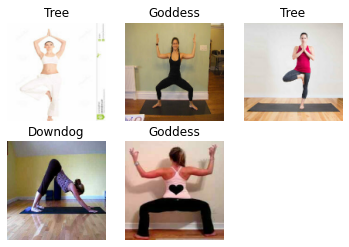

In [7]:
for img,labels in val_dataset:
    for i in range(5):
        plt.subplot(2,3,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(val_dataset.class_names[labels[i]])
        plt.axis("off")

In [8]:
def augmentations():
    augmentation = tf.keras.Sequential([
        RandomFlip('horizontal'), 
        RandomRotation(0.2) ,
        Rescaling(1./255)
    ])
    return augmentation

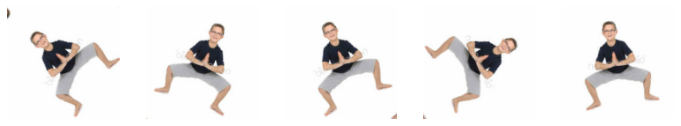

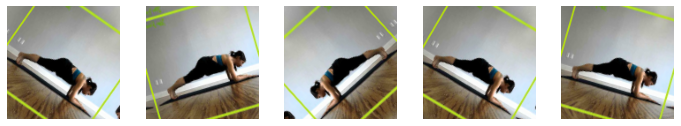

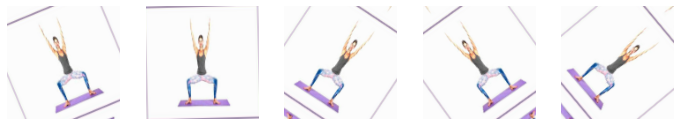

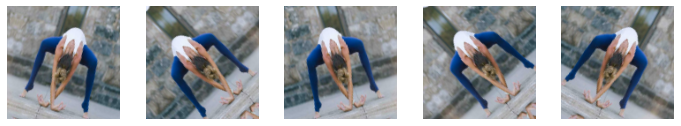

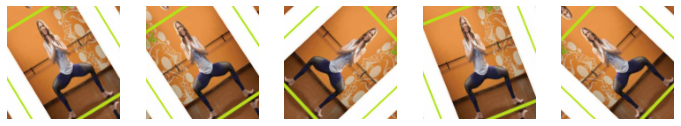

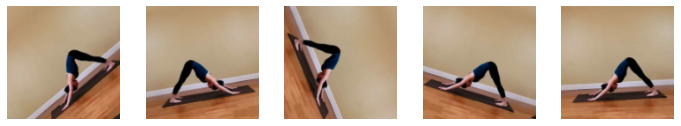

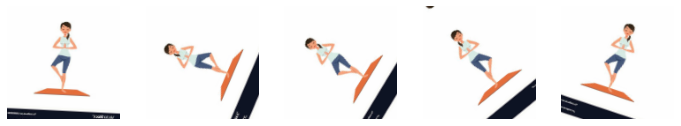

In [9]:
data_augmenter = augmentations()
for img, _ in val_dataset:
    plt.figure(figsize=(12,12))
    image = img[0]
    for i in range(5):
        plt.subplot(5, 5, i + 1)
        augmented_image = data_augmenter(tf.expand_dims(image,0))
        plt.imshow(augmented_image[0])
        plt.axis('off')

In [10]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [12]:
IMG_SIZE=128
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE,IMG_SIZE,3),
                                                   include_top=False,
                                                   weights='imagenet')

In [19]:
def model(image_size=IMG_SIZE,data_augmenter=augmentations(),base_model=base_model):
    input_shape = (image_size,image_size,3)
    inputs = tf.keras.Input(input_shape)
    base_model.trainable = True
    x = data_augmenter(inputs) 
    x = preprocess_input(x) 
    x = base_model(x, training=True) 
    x = tfl.MaxPool2D()(x) 
    x = tfl.Dropout(0.2)(x)
    x = tfl.Flatten()(x)
    outputs = tfl.Dense(units=5, activation='softmax')(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [20]:
model = model(IMG_SIZE, data_augmenter, base_model)

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [22]:
EPOCHS = 100
history = model.fit(train_dataset, validation_data=val_dataset, epochs=EPOCHS)

Epoch 1/100
25/25 [==============================] - 8s 122ms/step - loss: 2.5195 - accuracy: 0.5183 - val_loss: 1.0478 - val_accuracy: 0.7107
Epoch 2/100
25/25 [==============================] - 2s 73ms/step - loss: 1.3223 - accuracy: 0.7054 - val_loss: 1.4199 - val_accuracy: 0.7665
Epoch 3/100
25/25 [==============================] - 2s 72ms/step - loss: 0.9430 - accuracy: 0.7775 - val_loss: 1.0776 - val_accuracy: 0.7716
Epoch 4/100
25/25 [==============================] - 2s 72ms/step - loss: 0.7728 - accuracy: 0.8091 - val_loss: 0.5545 - val_accuracy: 0.8274
Epoch 5/100
25/25 [==============================] - 3s 95ms/step - loss: 0.4968 - accuracy: 0.8609 - val_loss: 0.5543 - val_accuracy: 0.8579
Epoch 6/100
25/25 [==============================] - 2s 74ms/step - loss: 0.3739 - accuracy: 0.8812 - val_loss: 0.3726 - val_accuracy: 0.8782
Epoch 7/100
25/25 [==============================] - 2s 74ms/step - loss: 0.4513 - accuracy: 0.8761 - val_loss: 0.6840 - val_accuracy: 0.7970
Epoch

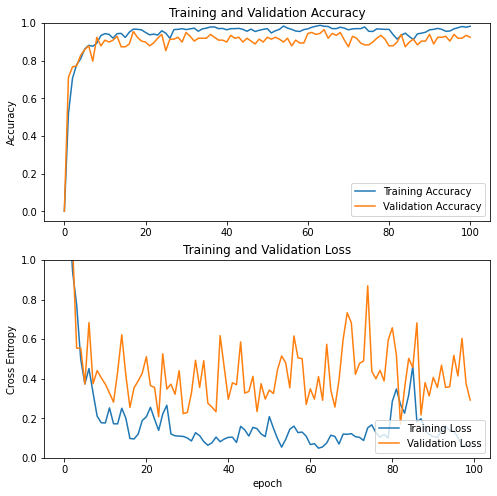

In [24]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()